In [1]:
from google.colab import drive
import pandas as pd

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Homework 3/Leaves_Data_Hw3.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Width   70 non-null     float64
 1   Length  70 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


## Imports

In [83]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.linear_model import Perceptron
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier

## Question 1

In [7]:
X = df[['Width', 'Length']].values

In [8]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)

In [9]:
distances, indices = nbrs.kneighbors(X)

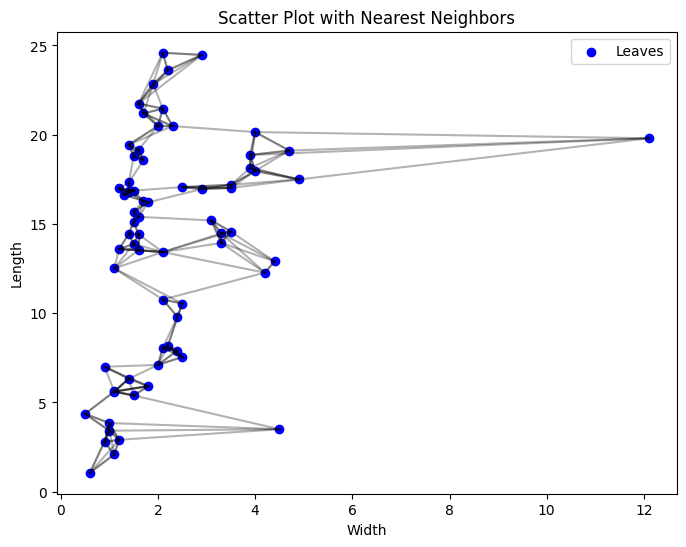

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Width'], df['Length'], c='blue', label='Leaves')
for i, neighbors in enumerate(indices):
    for neighbor in neighbors[1:]:  # Skip the first point (itself)
        plt.plot([X[i, 0], X[neighbor, 0]], [X[i, 1], X[neighbor, 1]], 'k-', alpha=0.3)
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('Scatter Plot with Nearest Neighbors')
plt.legend()
plt.show()

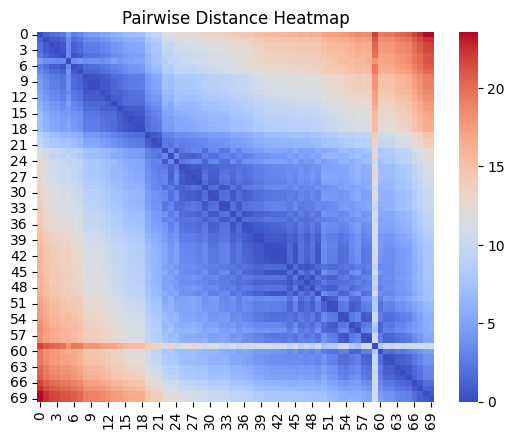

In [11]:
dist_matrix = squareform(pdist(X))
sns.heatmap(dist_matrix, cmap='coolwarm')
plt.title('Pairwise Distance Heatmap')
plt.show()

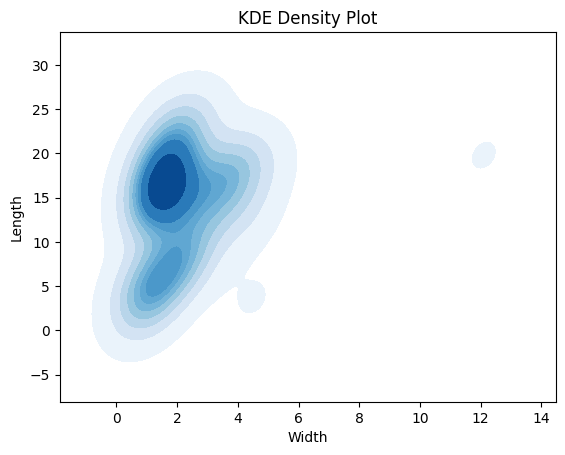

In [12]:
sns.kdeplot(x=df['Width'], y=df['Length'], fill=True, cmap='Blues')
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('KDE Density Plot')
plt.show()

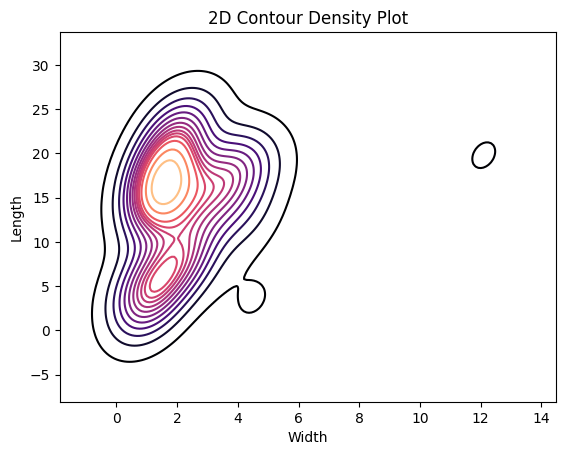

In [13]:
sns.kdeplot(x=df['Width'], y=df['Length'], levels=15, cmap='magma')
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('2D Contour Density Plot')
plt.show()

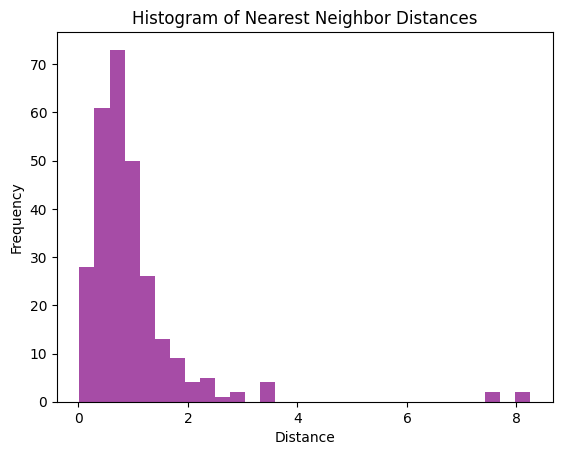

In [14]:
plt.hist(distances[:, 1:].flatten(), bins=30, color='purple', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Nearest Neighbor Distances')
plt.show()

## Question 2


In [15]:
X = df[['Width', 'Length']].values

In [16]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)

In [17]:
distances, _ = nbrs.kneighbors(X)

In [18]:
k_distance = np.sort(distances[:, 1])  # Distance to the 2nd nearest neighbor

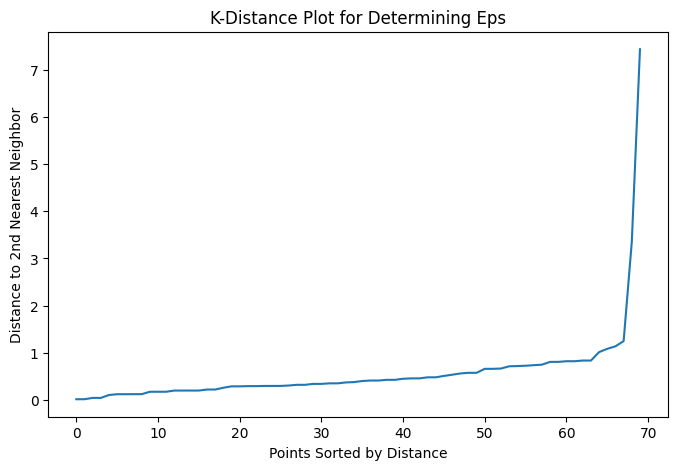

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(k_distance)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.title('K-Distance Plot for Determining Eps')
plt.show()

In [20]:
# 2. Apply DBSCAN
eps_value = 0.5  # Adjust based on K-distance plot analysis
min_samples_value = 5  # Minimum points in a cluster
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X)

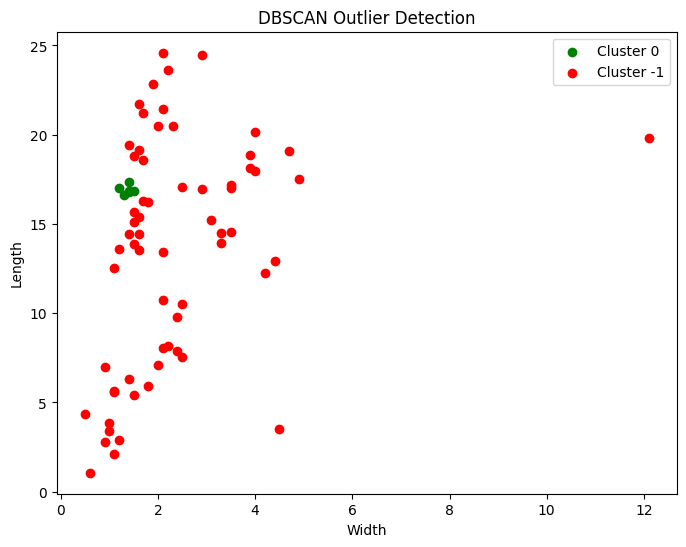

In [21]:
# 3. Scatter Plot with Core, Border, and Noise Points
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = {0: 'green', -1: 'red'}  # Default colors for core and noise points
for label in unique_labels:
    color = colors.get(label, 'yellow')  # Border points are yellow
    plt.scatter(X[labels == label, 0], X[labels == label, 1], c=color, label=f'Cluster {label}')
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('DBSCAN Outlier Detection')
plt.legend()
plt.show()

## Question 3


In [22]:
X = df[['Width', 'Length']].values

In [23]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)

In [24]:
distances, _ = nbrs.kneighbors(X)

In [25]:
k_distance = np.sort(distances[:, 1])  # Distance to the 2nd nearest neighbor

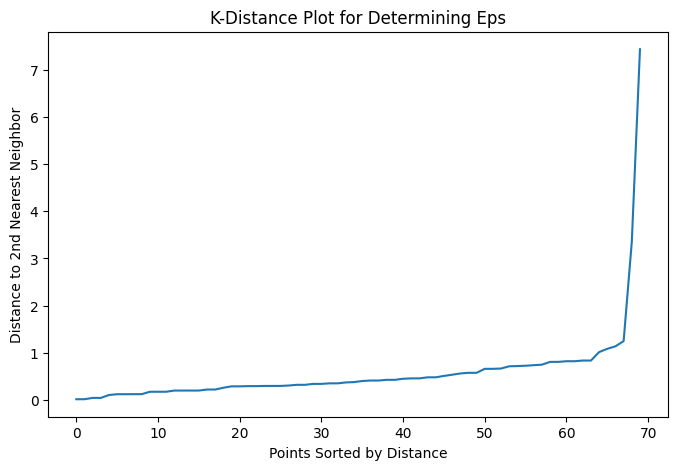

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(k_distance)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.title('K-Distance Plot for Determining Eps')
plt.show()

In [27]:
# 2. Apply DBSCAN
eps_value = 0.5  # Adjust based on K-distance plot analysis
min_samples_value = 5  # Minimum points in a cluster
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X)

In [28]:
# 3. Count the number of clusters
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters found: {num_clusters}')

Number of clusters found: 1


In [29]:
# 4. Scatter Plot with Clusters
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = sns.color_palette('hsv', len(unique_labels))

<Figure size 800x600 with 0 Axes>

<ipython-input-30-586d13574ec7>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[labels == label, 0], X[labels == label, 1], c=color, label=label_text)


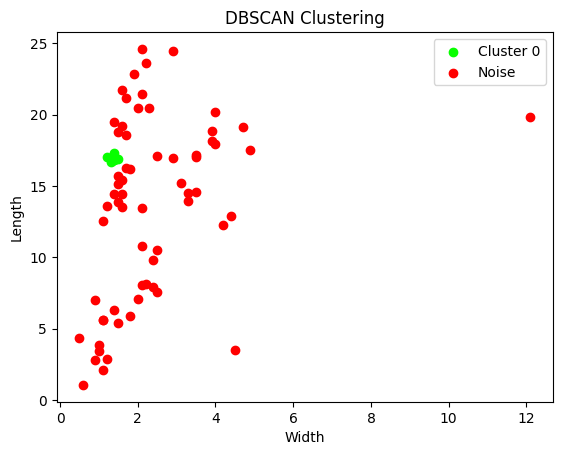

In [30]:
for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'red'  # Noise points
        label_text = 'Noise'
    else:
        label_text = f'Cluster {label}'
    plt.scatter(X[labels == label, 0], X[labels == label, 1], c=color, label=label_text)

plt.xlabel('Width')
plt.ylabel('Length')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [31]:
# 5. Interpretation
print("Interpretation:")
print("- The number of clusters found suggests how naturally the data groups.")
print("- If clusters are well separated, DBSCAN successfully identifies them.")
print("- If clusters overlap, it might indicate a need to adjust eps or min_samples.")

Interpretation:
- The number of clusters found suggests how naturally the data groups.
- If clusters are well separated, DBSCAN successfully identifies them.
- If clusters overlap, it might indicate a need to adjust eps or min_samples.


## Question 4


In [32]:
X = df[['Width', 'Length']].values

In [33]:
scaler = StandardScaler()

In [34]:
X_scaled = scaler.fit_transform(X)

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [36]:
kmeans_labels = kmeans.fit_predict(X_scaled)

In [37]:
# 2. Apply DBSCAN (from Q3) to compare
eps_value = 0.5  # Use the previously determined eps value
min_samples_value = 5
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(X_scaled)

<ipython-input-38-7a0e9c388f76>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1].scatter(X[dbscan_labels == label, 0], X[dbscan_labels == label, 1], c=color, label=label_text)


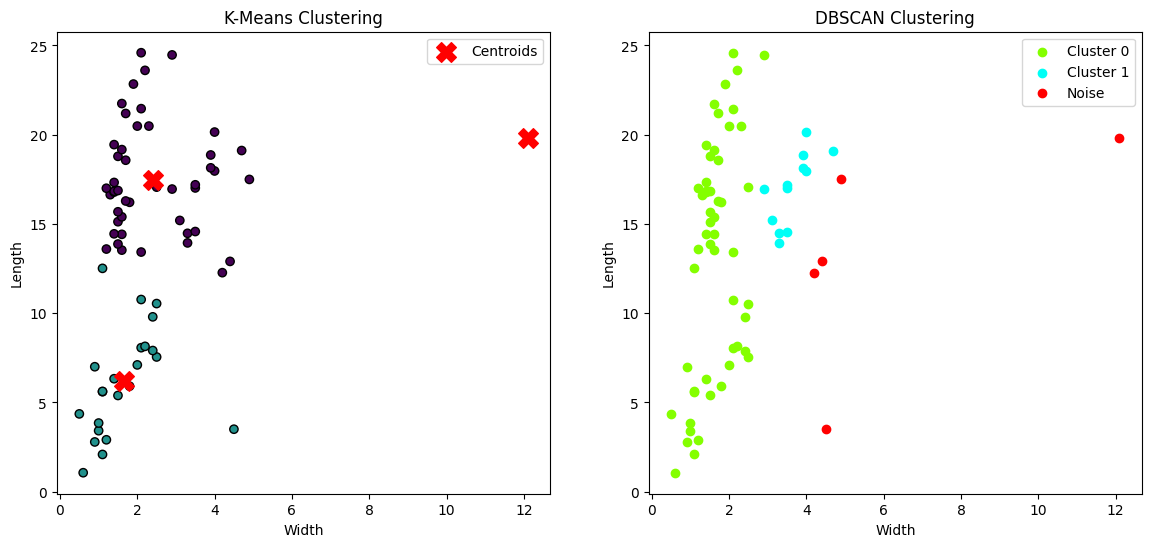

In [38]:
# 3. Scatter Plots for Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means Clustering
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
axes[0].scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
                kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
                c='red', marker='X', s=200, label='Centroids')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Length')
axes[0].legend()

# DBSCAN Clustering
unique_labels = set(dbscan_labels)
colors = sns.color_palette('hsv', len(unique_labels))
for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'red'  # Noise points
        label_text = 'Noise'
    else:
        label_text = f'Cluster {label}'
    axes[1].scatter(X[dbscan_labels == label, 0], X[dbscan_labels == label, 1], c=color, label=label_text)

axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Length')
axes[1].legend()

In [39]:
# 4. Interpretation
print("Interpretation:")
print("- K-Means forms spherical clusters, whereas DBSCAN detects arbitrary-shaped clusters.")
print("- Noise removal in DBSCAN impacts the final clusters, as noisy points may alter cluster centers in K-Means.")
print("- If the dataset contains many outliers, K-Means may be less robust compared to DBSCAN.")

Interpretation:
- K-Means forms spherical clusters, whereas DBSCAN detects arbitrary-shaped clusters.
- Noise removal in DBSCAN impacts the final clusters, as noisy points may alter cluster centers in K-Means.
- If the dataset contains many outliers, K-Means may be less robust compared to DBSCAN.


## Question 5

In [40]:
X = df[['Width', 'Length']].values

In [41]:
scaler = StandardScaler()

In [42]:
X_scaled = scaler.fit_transform(X)

In [43]:
kmeans_plus = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)

In [44]:
kmeans_labels = kmeans_plus.fit_predict(X_scaled)

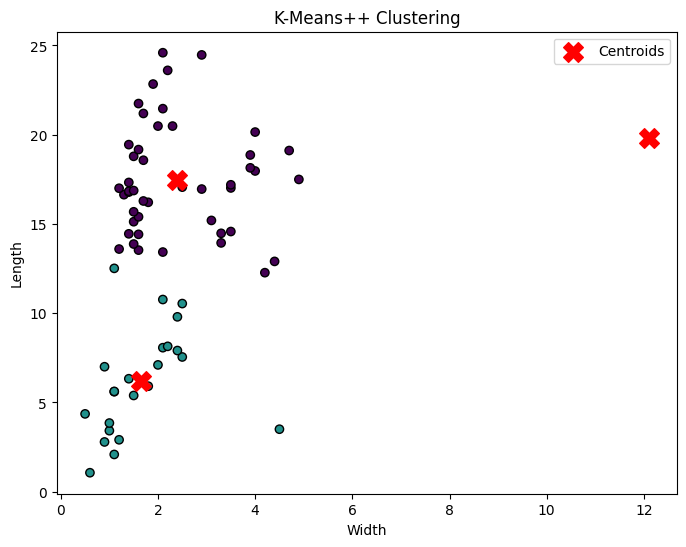

In [45]:
# 2. Scatter Plot for Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.scatter(kmeans_plus.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans_plus.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('K-Means++ Clustering')
plt.legend()
plt.show()

In [46]:
# 3. Interpretation
print("Interpretation:")
print("- K-Means++ improves cluster initialization, reducing convergence time and enhancing stability.")
print("- The centroids marked in red indicate cluster centers.")
print("- This method ensures better initial centroids compared to standard K-Means.")

Interpretation:
- K-Means++ improves cluster initialization, reducing convergence time and enhancing stability.
- The centroids marked in red indicate cluster centers.
- This method ensures better initial centroids compared to standard K-Means.


## Question 6


In [47]:
X = df[['Width', 'Length']].values

In [48]:
scaler = StandardScaler()

In [49]:
X_scaled = scaler.fit_transform(X)

In [50]:
linkage_matrix = linkage(X_scaled, method='ward')

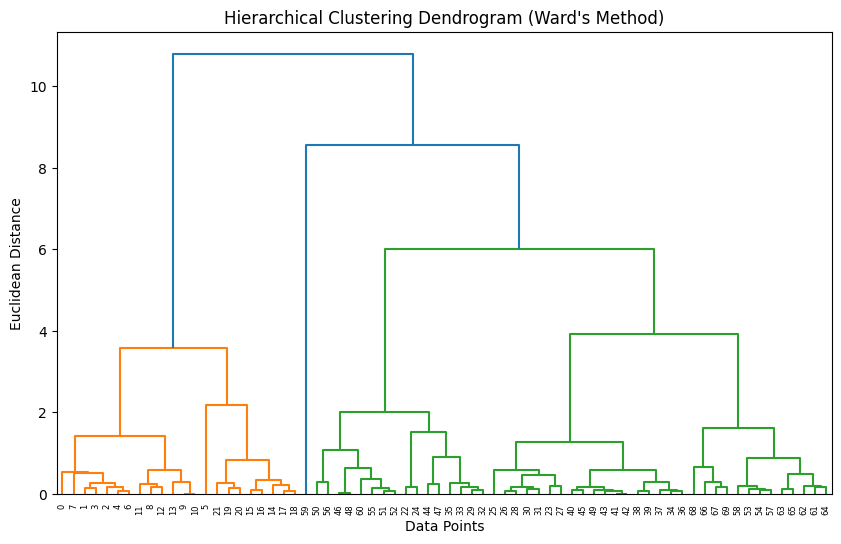

In [51]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.show()

In [52]:
print("Interpretation:")
print("- The dendrogram shows how clusters merge at different levels of hierarchy.")
print("- A higher linkage height suggests more dissimilar clusters being merged.")
print("- Cutting the dendrogram at an appropriate height determines the final cluster count.")

Interpretation:
- The dendrogram shows how clusters merge at different levels of hierarchy.
- A higher linkage height suggests more dissimilar clusters being merged.
- Cutting the dendrogram at an appropriate height determines the final cluster count.


## Question 7

In [53]:
X = df[['Width', 'Length']].values

In [54]:
scaler = StandardScaler()

In [55]:
X_scaled = scaler.fit_transform(X)

In [56]:
linkage_matrix = linkage(X_scaled, method='ward')

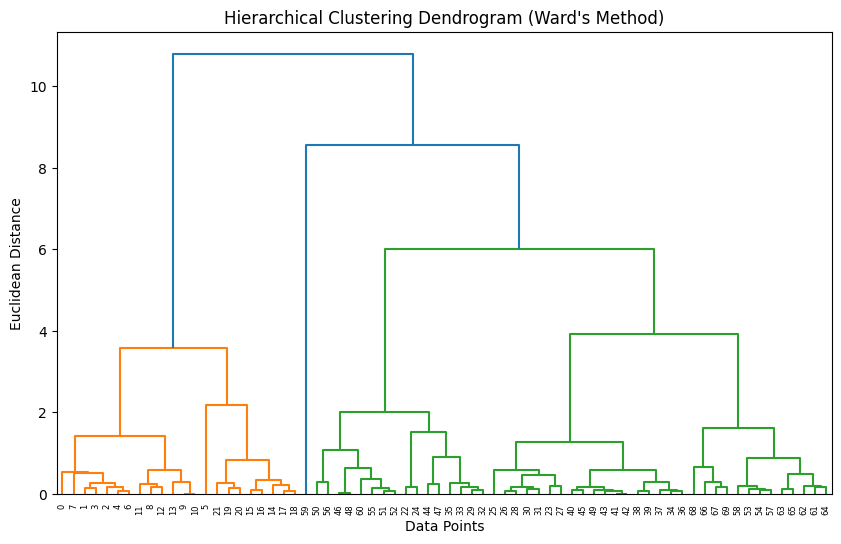

In [57]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.show()

In [58]:
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
df['Cluster'] = cluster_labels

In [59]:
models = []
for i in range(1, num_clusters + 1):
    binary_labels = (cluster_labels == i).astype(int)
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_scaled, binary_labels)
    models.append(perceptron)
    print(f"Equation of separating hyperplane for Class {chr(64+i)}:")
    print(f"{perceptron.coef_[0][0]:.4f} * X1 + {perceptron.coef_[0][1]:.4f} * X2 + {perceptron.intercept_[0]:.4f} = 0")

Equation of separating hyperplane for Class A:
-0.0063 * X1 + -2.0382 * X2 + -1.0000 = 0
Equation of separating hyperplane for Class B:
-6.7620 * X1 + 8.1841 * X2 + 4.0000 = 0
Equation of separating hyperplane for Class C:
2.9788 * X1 + -1.0090 * X2 + -6.0000 = 0


In [60]:
print("Interpretation:")
print("- The dendrogram shows how clusters merge at different levels of hierarchy.")
print("- A higher linkage height suggests more dissimilar clusters being merged.")
print("- Cutting the dendrogram at an appropriate height determines the final cluster count.")
print("- The separating hyperplanes define the boundaries between classes A, B, and C.")

Interpretation:
- The dendrogram shows how clusters merge at different levels of hierarchy.
- A higher linkage height suggests more dissimilar clusters being merged.
- Cutting the dendrogram at an appropriate height determines the final cluster count.
- The separating hyperplanes define the boundaries between classes A, B, and C.


## Question 8


In [61]:
X = df[['Width', 'Length']].values

In [62]:
scaler = StandardScaler()

In [63]:
X_scaled = scaler.fit_transform(X)

In [64]:
linkage_matrix = linkage(X_scaled, method='ward')

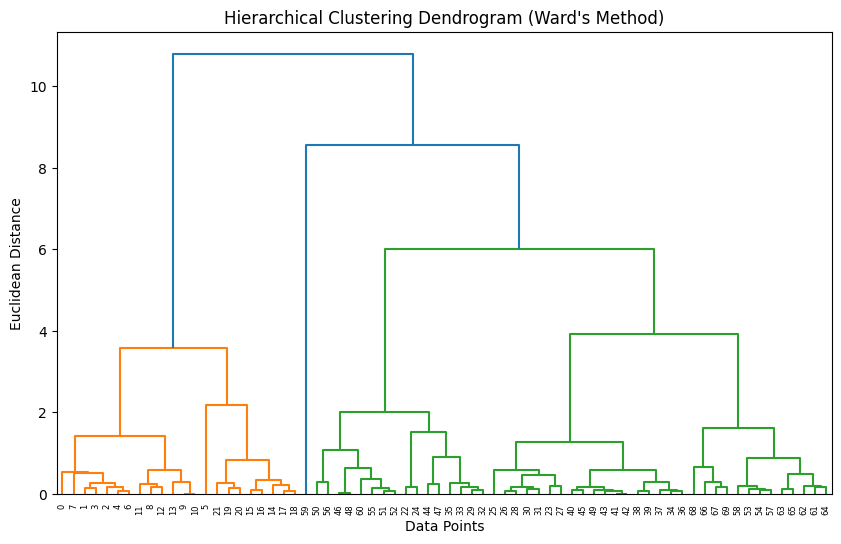

In [65]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.show()

In [66]:
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
df['Cluster'] = cluster_labels

In [67]:
models = []
for i in range(1, num_clusters + 1):
    binary_labels = (cluster_labels == i).astype(int)
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_scaled, binary_labels)
    models.append(perceptron)
    print(f"Equation of separating hyperplane for Class {chr(64+i)}:")
    print(f"{perceptron.coef_[0][0]:.4f} * X1 + {perceptron.coef_[0][1]:.4f} * X2 + {perceptron.intercept_[0]:.4f} = 0")

Equation of separating hyperplane for Class A:
-0.0063 * X1 + -2.0382 * X2 + -1.0000 = 0
Equation of separating hyperplane for Class B:
-6.7620 * X1 + 8.1841 * X2 + 4.0000 = 0
Equation of separating hyperplane for Class C:
2.9788 * X1 + -1.0090 * X2 + -6.0000 = 0


Cluster A - Mean: [-0.38791946 -1.29077609], Covariance Matrix: [[0.32203691 0.11149352]
 [0.11149352 0.19736693]]
Cluster B - Mean: [0.05040899 0.58331245], Covariance Matrix: [[ 0.47391101 -0.00074063]
 [-0.00074063  0.26621731]]
Cluster C - Mean: [6.16500568 0.98138886], Covariance Matrix: 13.434941682123531


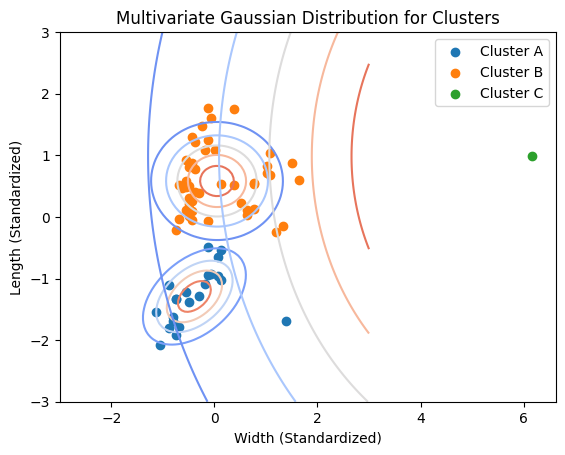

In [68]:
for i in range(1, num_clusters + 1):
    cluster_points = X_scaled[cluster_labels == i]
    mean = np.mean(cluster_points, axis=0)
    cov = np.cov(cluster_points, rowvar=False)
    print(f"Cluster {chr(64+i)} - Mean: {mean}, Covariance Matrix: {cov}")

    # Plot Gaussian Contours
    x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    plt.contour(x, y, rv.pdf(pos), levels=5, cmap='coolwarm')
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {chr(64+i)}')

plt.xlabel('Width (Standardized)')
plt.ylabel('Length (Standardized)')
plt.title('Multivariate Gaussian Distribution for Clusters')
plt.legend()
plt.show()

In [69]:
print("Interpretation:")
print("- The Gaussian distributions approximate each cluster's spread and density.")
print("- The covariance matrices indicate the shape and orientation of clusters.")
print("- Overlapping distributions may suggest clusters that are not well separated.")

Interpretation:
- The Gaussian distributions approximate each cluster's spread and density.
- The covariance matrices indicate the shape and orientation of clusters.
- Overlapping distributions may suggest clusters that are not well separated.


## Question 9


In [70]:
# Extract features
X = df[['Width', 'Length']].values

In [71]:
# Standardize features for better clustering performance
scaler = StandardScaler()

In [72]:
X_scaled = scaler.fit_transform(X)

In [73]:
# 1. Apply Hierarchical Clustering using Ward's Method
linkage_matrix = linkage(X_scaled, method='ward')

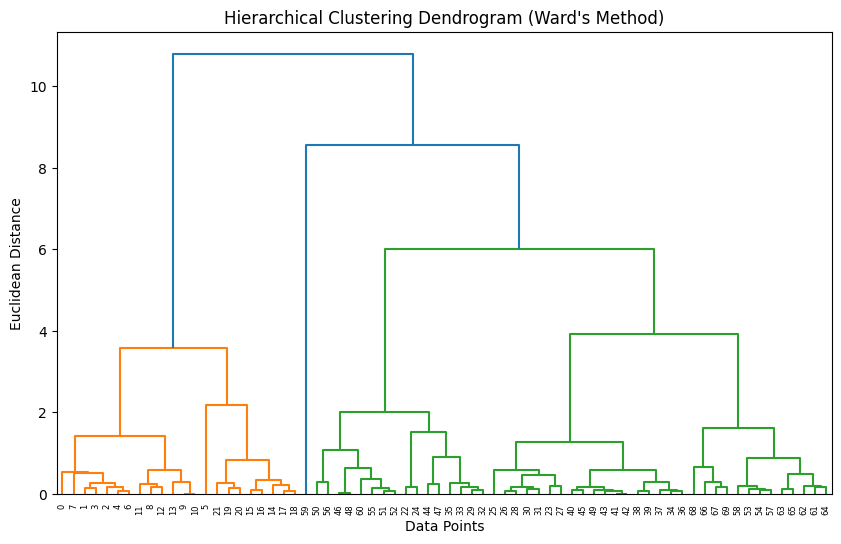

In [74]:
# 2. Plot Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.show()

In [75]:
# 3. Divide data into 3 clusters
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
df['Cluster'] = cluster_labels

In [76]:
# 4. Train Perceptron to find separating hyperplanes
models = []
for i in range(1, num_clusters + 1):
    binary_labels = (cluster_labels == i).astype(int)
    perceptron = Perceptron(random_state=42)
    perceptron.fit(X_scaled, binary_labels)
    models.append(perceptron)
    print(f"Equation of separating hyperplane for Class {chr(64+i)}:")
    print(f"{perceptron.coef_[0][0]:.4f} * X1 + {perceptron.coef_[0][1]:.4f} * X2 + {perceptron.intercept_[0]:.4f} = 0")

Equation of separating hyperplane for Class A:
-0.0063 * X1 + -2.0382 * X2 + -1.0000 = 0
Equation of separating hyperplane for Class B:
-6.7620 * X1 + 8.1841 * X2 + 4.0000 = 0
Equation of separating hyperplane for Class C:
2.9788 * X1 + -1.0090 * X2 + -6.0000 = 0


Cluster A - Mean: [-0.38791946 -1.29077609], Covariance Matrix: [[0.32203691 0.11149352]
 [0.11149352 0.19736693]]
Cluster B - Mean: [0.05040899 0.58331245], Covariance Matrix: [[ 0.47391101 -0.00074063]
 [-0.00074063  0.26621731]]
Cluster C - Mean: [6.16500568 0.98138886], Covariance Matrix: 13.434941682123531


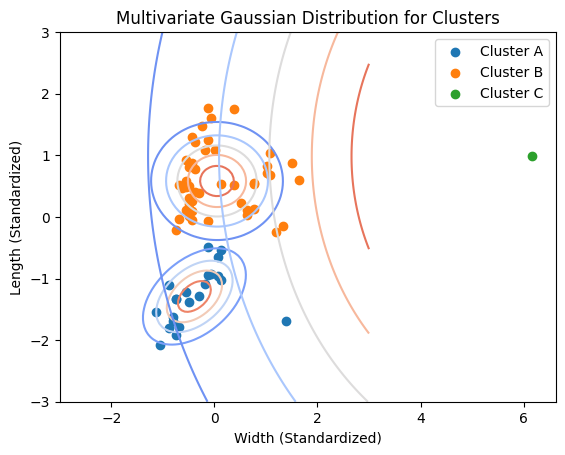

In [77]:
# 5. Estimate Multivariate Gaussian Distributions
means = []
covariances = []
for i in range(1, num_clusters + 1):
    cluster_points = X_scaled[cluster_labels == i]
    mean = np.mean(cluster_points, axis=0)
    cov = np.cov(cluster_points, rowvar=False)
    means.append(mean)
    covariances.append(cov)
    print(f"Cluster {chr(64+i)} - Mean: {mean}, Covariance Matrix: {cov}")

    # Plot Gaussian Contours
    x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    plt.contour(x, y, rv.pdf(pos), levels=5, cmap='coolwarm')
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {chr(64+i)}')

plt.xlabel('Width (Standardized)')
plt.ylabel('Length (Standardized)')
plt.title('Multivariate Gaussian Distribution for Clusters')
plt.legend()
plt.show()

In [78]:
# 6. Classification of Point (1.9, 6) using Three Methods
new_point = np.array([[1.9, 6]])
new_point_scaled = scaler.transform(new_point)

In [79]:
# MLE Method
mle_probs = [multivariate_normal.pdf(new_point_scaled, mean=means[i], cov=covariances[i]) for i in range(num_clusters)]
mle_class = np.argmax(mle_probs) + 1
print(f"MLE Classification: Class {chr(64+mle_class)}")

MLE Classification: Class A


In [80]:
# Hyperplane Method
hyperplane_preds = [model.predict(new_point_scaled)[0] for model in models]
hyperplane_class = np.argmax(hyperplane_preds) + 1
print(f"Hyperplane Classification: Class {chr(64+hyperplane_class)}")

Hyperplane Classification: Class A


In [84]:
# K-NN Method
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, cluster_labels)
knn_class = knn.predict(new_point_scaled)[0]
print(f"K-NN Classification: Class {chr(64+knn_class)}")

K-NN Classification: Class A


In [85]:
# 7. Interpretation
print("Interpretation:")
print("- MLE assigns the point to the class with the highest probability under the Gaussian model.")
print("- The hyperplane method uses perceptron decision boundaries to classify the point.")
print("- K-NN finds the closest neighbors and assigns the majority class.")

Interpretation:
- MLE assigns the point to the class with the highest probability under the Gaussian model.
- The hyperplane method uses perceptron decision boundaries to classify the point.
- K-NN finds the closest neighbors and assigns the majority class.
